In [102]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split , cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.datasets import fetch_california_housing 
from sklearn.metrics import mean_squared_error,r2_score
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline
import matplotlib.pyplot as plt
import seaborn as sns

In [103]:
data = fetch_california_housing()
df=pd.DataFrame(data.data,columns=data.feature_names)
df['Price'] = data.target

In [104]:
X=df[['MedInc']]
y=df[['Price']]
print(df.head())

   MedInc  HouseAge  AveRooms  AveBedrms  Population  AveOccup  Latitude  \
0  8.3252      41.0  6.984127   1.023810       322.0  2.555556     37.88   
1  8.3014      21.0  6.238137   0.971880      2401.0  2.109842     37.86   
2  7.2574      52.0  8.288136   1.073446       496.0  2.802260     37.85   
3  5.6431      52.0  5.817352   1.073059       558.0  2.547945     37.85   
4  3.8462      52.0  6.281853   1.081081       565.0  2.181467     37.85   

   Longitude  Price  
0    -122.23  4.526  
1    -122.22  3.585  
2    -122.24  3.521  
3    -122.25  3.413  
4    -122.25  3.422  


In [105]:
#Try degrees 1-5 and compare cv MSE 
degrees=[1,2,3,4,5]
cv_scores=[]

In [106]:
for d in degrees:
    model = make_pipeline(PolynomialFeatures(degree=d, include_bias=False),
                          LinearRegression())
    # we use negative MSE because sklearn's cross_val_score maximizes score
    scores = cross_val_score(model, X, y, cv=5, scoring='neg_mean_squared_error')
    cv_scores.append(-scores.mean())

In [107]:
for d , score in zip(degrees,cv_scores):
        print(f"Degree{d}->CV MSE : {score:.4f}")

Degree1->CV MSE : 0.7232
Degree2->CV MSE : 0.7183
Degree3->CV MSE : 0.7074
Degree4->CV MSE : 0.7076
Degree5->CV MSE : 0.7076


In [112]:
# Pick best degree (lowest MSE), train-test evaluation
best_degree = degrees[int(np.argmin(cv_scores))]
print("Best degree:", best_degree)


Best degree: 3


In [113]:
model = make_pipeline(PolynomialFeatures(degree=best_degree, include_bias=False),
                      LinearRegression())
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=42)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)


In [114]:
print("Test MSE:", mean_squared_error(y_test, y_pred), "R2:", r2_score(y_test, y_pred))


Test MSE: 0.6982964744960318 R2: 0.46711562108386273


C:\Users\Gyanendra Tiwari\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but PolynomialFeatures was fitted with feature names
  warnings.warn(


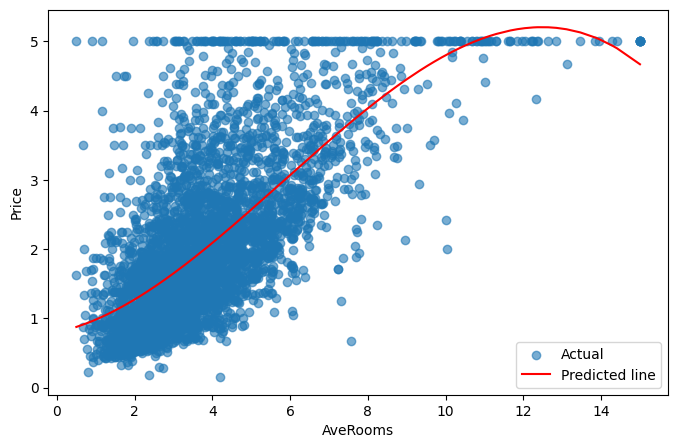

In [116]:
plt.figure(figsize=(8,5))
plt.scatter(X_test, y_test, alpha=0.6, label="Actual")
plt.plot(
    np.sort(X_test.values.flatten()),
    model.predict(np.sort(X_test.values.flatten()).reshape(-1,1)),
    color='red', label="Predicted line")
plt.xlabel("AveRooms")
plt.ylabel("Price")
plt.legend()
plt.show()